In [2]:
import pandas as pd
from nltk.stem.porter import PorterStemmer

In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Pramukh
[nltk_data]     Prajapati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df= pd.read_csv('./Restaurant_Reviews 1.tsv', delimiter='\t', quoting=3)

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
df.shape

(1000, 2)

In [7]:
df["Review"][0]

'Wow... Loved this place.'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [10]:
import string
import re
corpus=[]
for i in range (0,1000):
  review=re.sub('[^a-zA-Z]',repl=' ',string=df['Review'][i])
  review=review.lower()
  review_word=review.split()
  review_word=[word for word in review_word if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  review1=[ps.stem(word) for word in review_word]
  review=' '.join(review_word)
  corpus.append(review)

In [11]:
corpus[:1000]

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great prices',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warmer',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vegas',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care less interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also combo

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)

In [13]:
x=cv.fit_transform(corpus).toarray()

In [14]:
x.shape

(1000, 1500)

In [15]:
x[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
x[0].max()

1

In [17]:
y=df.iloc[:,-1].values

In [18]:
y.shape

(1000,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=104)

In [21]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [22]:
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [23]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)

BernoulliNB()

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
y_predG=clf1.predict(x_test)
y_predM=clf2.predict(x_test)
y_predB=clf3.predict(x_test)

In [26]:
print("GaussianNB",y_predG)
print("MultinomialNB",y_predM)
print("BernoulliNB",y_predB)

GaussianNB [1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1]
MultinomialNB [1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1]
BernoulliNB [1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1

In [27]:
print("GaussianNB Accuracy",accuracy_score(y_predG, y_test)*100,"%")
print("MultinomialNB Accuracy",accuracy_score(y_predM, y_test)*100,"%")
print("BernoulliNB Accuracy",accuracy_score(y_predB, y_test)*100,"%")

GaussianNB Accuracy 71.0 %
MultinomialNB Accuracy 78.0 %
BernoulliNB Accuracy 77.5 %


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Random forest Accuracy",accuracy_score(y_test,y_pred)*100,"%")

Random forest Accuracy 71.5 %


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predM)
print(cm)

[[74 30]
 [14 82]]


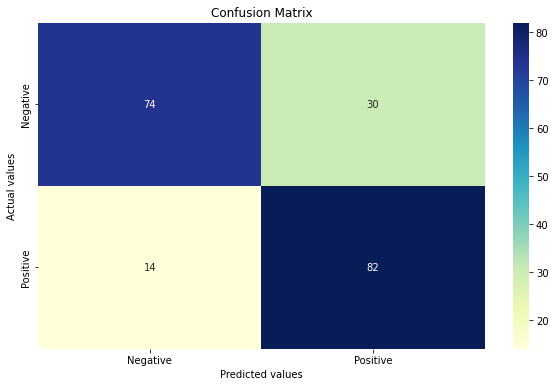

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu", xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix")
plt.show()

In [31]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

best_accuracy = 0.0
alpha_val = 0.0

for i in np.arange(0.1, 1.1, 0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(x_train, y_train)

    temp_y_pred = temp_classifier.predict(x_test)
    score = accuracy_score(y_test, temp_y_pred)

    print(f"Accuracy score for alpha={round(i, 1)} is: {round(score * 100, 2)}%")

    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i

print()
print(f'The best accuracy is {round(best_accuracy * 100, 2)}% with alpha value as {round(alpha_val, 1)}')


Accuracy score for alpha=0.1 is: 79.0%
Accuracy score for alpha=0.2 is: 78.0%
Accuracy score for alpha=0.3 is: 78.5%
Accuracy score for alpha=0.4 is: 79.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.0%
Accuracy score for alpha=0.7 is: 77.0%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 77.5%
Accuracy score for alpha=1.0 is: 78.0%

The best accuracy is 79.0% with alpha value as 0.1


In [32]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [33]:
def predict_sentiment(sample_review):
    sample_review=re.sub('[^a-zA-Z]',repl=' ',string=sample_review)
    sample_review=sample_review.lower()
    sample_review_words=sample_review.split()
    sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review=[ps.stem(word) for word in sample_review_words]
    final_review=' '.join(final_review)
    temp=cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [35]:
# Predicting Values
sample_review = input('Enter your review: ')
if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

Enter your review: very nice resturant's food
This is a POSITIVE review.
